# Day 10: Machine Learning

## Tutorial on Machine Learning
* 張鈞閔, [Hands-On Tutorial of Machine Learning in Python](https://github.com/twcmchang/hands-on-ML/blob/master/Hands-on%20Tutorial%20of%20Machine%20Learning%20in%20Python.pdf), 中央研究院資訊科學所, 2017.9.19
* Plotting decision regions
    * http://rasbt.github.io/mlxtend/
    * Installation of the package `mlxtend`:
        ```bash
        pip install mlxtend
        ```
* References:
    * scikit-learn: http://scikit-learn.org/stable/
    * Vikram Kamath, [introduction to machine learning](https://in.pycon.org/2011/static/files/talks/11/Introduction_To_ML_Partial_2.pdf), 2011
    * Pedro Domingos, [A Few Useful Things to Know about Machine Learning](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf), University of Washington
    * Prof. 林軒田, [Machine Learning Foundations (機器學習基石)](https://www.youtube.com/playlist?list=PLXVfgk9fNX2I7tB6oIINGBmW50rrmFTqf) (Youtube channel)
    * Dr. 董孟雲, [金融實務專題-人工智慧交易應用](https://github.com/andydong1209/NTU_AI/blob/master/%E4%BA%BA%E5%B7%A5%E6%99%BA%E6%85%A7%E4%BA%A4%E6%98%93%E7%AD%96%E7%95%A5%E6%87%89%E7%94%A8_Print.pdf), 2019.4.12
    * Marcos Lopez de Prado, [Advances in Financial Machine Learning](https://images-na.ssl-images-amazon.com/images/I/51A6sUbwG2L.jpg), 2018
    ![](https://images-na.ssl-images-amazon.com/images/I/51A6sUbwG2L._SX329_BO1,204,203,200_.jpg)

### Regression
* Linear Regression
* LASSO regression
* Ridge regression
* Logistic regression

#### Example 1: linear regression (revisited)

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6
rcParams['axes.grid'] = True

x = np.array([i * np.pi / 180 for i in range(60, 300, 4)])
np.random.seed(100)
y = np.sin(x) + np.random.normal(0, 0.15, len(x))
data = pd.DataFrame(np.column_stack([x, y]), columns = ['x', 'y'])

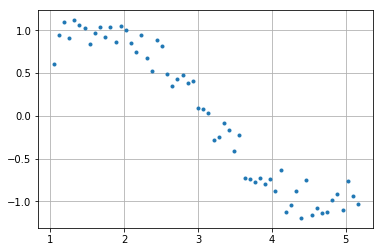

In [2]:
plt.plot(data['x'], data['y'], '.')

In [3]:
for i in range(2, 16):
    data["x_{}".format(i)] = data['x'] ** i
data.head()

x         y       x_2       x_3       x_4       x_5       x_6  \
0  1.047198  0.603561  1.096623  1.148381  1.202581  1.259340  1.318778   
1  1.117011  0.950196  1.247713  1.393709  1.556788  1.738948  1.942424   
2  1.186824  1.100139  1.408551  1.671702  1.984016  2.354677  2.794587   
3  1.256637  0.913191  1.579137  1.984402  2.493673  3.133642  3.937850   
4  1.326450  1.117494  1.759470  2.333850  3.095735  4.106339  5.446854   

        x_7       x_8        x_9       x_10       x_11       x_12       x_13  \
0  1.381021  1.446202   1.514459   1.585938   1.660790   1.739176   1.821260   
1  2.169709  2.423588   2.707173   3.023942   3.377775   3.773011   4.214494   
2  3.316683  3.936319   4.671717   5.544505   6.580351   7.809718   9.268760   
3  4.948448  6.218404   7.814277   9.819710  12.339811  15.506664  19.486248   
4  7.224981  9.583578  12.712139  16.862020  22.366630  29.668222  39.353420   

        x_14       x_15  
0   1.907219   1.997235  
1   4.707635   5.258479  
2  11.000386  13.055521  
3  24.487142  30.771450  
4  52.200353  69.241170

In [4]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [5]:
def example_regression(data, power, plot_dict, reg_type, alpha = 0):
    
    type_dict = {'Linear' : LinearRegression(normalize = True),
                 'Lasso' : Lasso(alpha = alpha, normalize = True),
                 'Ridge' : Ridge(alpha = alpha, normalize = True)}
    
    X = ['x']
    if power >=2:
        X.extend(['x_{}'.format(i) for i in range(2, power + 1)])
    
    if reg_type in type_dict:
        model = type_dict[reg_type]
    model.fit(data[X], data['y'])
    y_pred = model.predict(data[X])
    
    if power in plot_dict:
        plt.subplot(plot_dict[power])
        plt.tight_layout()
        plt.plot(data['x'], data['y'], '.')
        plt.plot(data['x'], y_pred)
        plt.title('Plot for power: {}'.format(power))
    
    rss = sum((y_pred-data['y']) ** 2)
    ret = [rss]
    ret.extend([model.intercept_])
    ret.extend(model.coef_)
    return ret

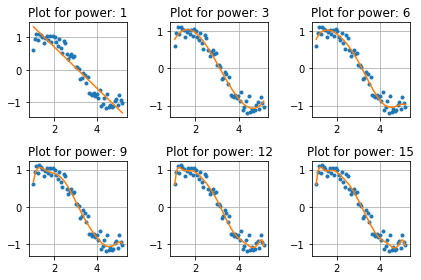

In [6]:
col = ['rss', 'intercept'] + ['coef_x_{}'.format(i) for i in range(1, 16)]
ind = ['pow_{}'.format(i) for i in range(1, 16)]

perf_Linear = pd.DataFrame(index = ind, columns = col)
plot_dict = {1 : 231, 3 : 232, 6 : 233, 9 : 234, 12 : 235, 15 : 236}

for i in range(1, 16):
    perf_Linear.iloc[i - 1, 0 : i + 2] = example_regression(data, power = i, plot_dict = plot_dict, reg_type = 'Linear')

In [7]:
pd.options.display.float_format = '{:,.2g}'.format
perf_Linear

rss intercept coef_x_1 coef_x_2 coef_x_3 coef_x_4 coef_x_5 coef_x_6  \
pow_1   3.7         2    -0.65      NaN      NaN      NaN      NaN      NaN   
pow_2   3.7       1.9    -0.54   -0.017      NaN      NaN      NaN      NaN   
pow_3   1.1      -1.4      3.4     -1.4     0.15      NaN      NaN      NaN   
pow_4   1.1      -1.1      2.9     -1.1    0.087   0.0051      NaN      NaN   
pow_5     1       0.7    -0.86      1.8    -0.97     0.18   -0.012      NaN   
pow_6     1      -6.1       16      -15      7.4       -2     0.28   -0.016   
pow_7  0.98       -19       54      -61       36      -13      2.5    -0.26   
pow_8  0.94       -66  2.1e+02 -2.9e+02  2.1e+02      -93       26     -4.2   
pow_9  0.94       -70  2.3e+02 -3.1e+02  2.4e+02 -1.1e+02       31     -5.5   
pow_10 0.88  -4.6e+02  1.9e+03 -3.4e+03  3.5e+03 -2.3e+03  9.9e+02 -2.9e+02   
pow_11 0.88  -5.4e+02  2.3e+03 -4.2e+03  4.4e+03   -3e+03  1.4e+03 -4.3e+02   
pow_12 0.88  -9.9e+02  4.6e+03 -9.4e+03  1.1e+04 -9.2e+03  5.1e+03 -2.1e+03   
pow_13 0.88  -1.4e+03  6.8e+03 -1.5e+04    2e+04 -1.7e+04  1.1e+04 -4.8e+03   
pow_14 0.87   2.5e+03 -1.7e+04  4.9e+04 -8.3e+04  9.5e+04 -7.6e+04  4.4e+04   
pow_15 0.87   1.8e+03 -1.2e+04  3.5e+04 -5.9e+04  6.6e+04 -5.1e+04  2.8e+04   

       coef_x_7 coef_x_8 coef_x_9 coef_x_10 coef_x_11 coef_x_12 coef_x_13  \
pow_1       NaN      NaN      NaN       NaN       NaN       NaN       NaN   
pow_2       NaN      NaN      NaN       NaN       NaN       NaN       NaN   
pow_3       NaN      NaN      NaN       NaN       NaN       NaN       NaN   
pow_4       NaN      NaN      NaN       NaN       NaN       NaN       NaN   
pow_5       NaN      NaN      NaN       NaN       NaN       NaN       NaN   
pow_6       NaN      NaN      NaN       NaN       NaN       NaN       NaN   
pow_7     0.011      NaN      NaN       NaN       NaN       NaN       NaN   
pow_8      0.39   -0.015      NaN       NaN       NaN       NaN       NaN   
pow_9      0.57    -0.03  0.00054       NaN       NaN       NaN       NaN   
pow_10       57     -7.3     0.53    -0.017       NaN       NaN       NaN   
pow_11       93      -13      1.2    -0.062    0.0013       NaN       NaN   
pow_12  5.9e+02 -1.2e+02       18      -1.7       0.1   -0.0027       NaN   
pow_13  1.6e+03 -3.9e+02       70      -8.9      0.75    -0.038   0.00088   
pow_14 -1.9e+04  6.1e+03 -1.5e+03   2.6e+02       -32       2.7     -0.14   
pow_15 -1.1e+04  3.3e+03 -6.9e+02        94      -6.5     -0.18     0.084   

       coef_x_14 coef_x_15  
pow_1        NaN       NaN  
pow_2        NaN       NaN  
pow_3        NaN       NaN  
pow_4        NaN       NaN  
pow_5        NaN       NaN  
pow_6        NaN       NaN  
pow_7        NaN       NaN  
pow_8        NaN       NaN  
pow_9        NaN       NaN  
pow_10       NaN       NaN  
pow_11       NaN       NaN  
pow_12       NaN       NaN  
pow_13       NaN       NaN  
pow_14    0.0032       NaN  
pow_15   -0.0071   0.00022

#### Example 2: ridge regression

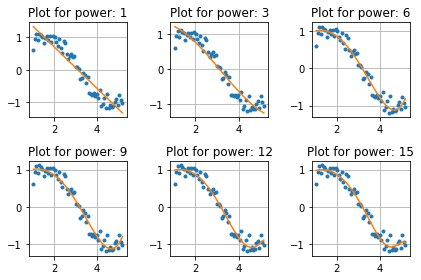

In [10]:
perf_Ridge = pd.DataFrame(index = ind, columns = col)

for i in range(1, 16):
    perf_Ridge.iloc[i - 1,0 : i + 2] = example_regression(data, power = i, plot_dict = plot_dict, reg_type = 'Ridge', alpha = 1e-3)

In [11]:
pd.options.display.float_format = '{:,.2g}'.format
perf_Ridge

rss intercept coef_x_1 coef_x_2 coef_x_3 coef_x_4 coef_x_5 coef_x_6  \
pow_1  3.7         2    -0.65      NaN      NaN      NaN      NaN      NaN   
pow_2  3.7       1.8    -0.53   -0.019      NaN      NaN      NaN      NaN   
pow_3  2.7       1.3     0.24    -0.31    0.032      NaN      NaN      NaN   
pow_4  1.6      0.71     0.68    -0.28    -0.03   0.0091      NaN      NaN   
pow_5  1.3      0.61     0.63    -0.19   -0.034 -0.00049   0.0015      NaN   
pow_6  1.3      0.68      0.5    -0.15   -0.028   -0.002   0.0004  0.00019   
pow_7  1.3      0.73     0.44    -0.14   -0.025  -0.0018  0.00022   0.0001   
pow_8  1.3      0.74     0.43    -0.14   -0.024  -0.0018  0.00022  9.9e-05   
pow_9  1.3      0.72     0.45    -0.14   -0.025   -0.002  0.00019   0.0001   
pow_10 1.2      0.69     0.47    -0.13   -0.026  -0.0024  0.00012   0.0001   
pow_11 1.2      0.67     0.48    -0.13   -0.026  -0.0027  3.1e-05  8.6e-05   
pow_12 1.2      0.66     0.47    -0.12   -0.026  -0.0029 -4.6e-05    7e-05   
pow_13 1.1      0.67     0.46    -0.12   -0.025  -0.0029  -0.0001  5.5e-05   
pow_14 1.1      0.68     0.44    -0.11   -0.024  -0.0029 -0.00014  4.4e-05   
pow_15 1.1      0.69     0.43    -0.11   -0.024  -0.0029 -0.00015  3.6e-05   

       coef_x_7 coef_x_8 coef_x_9 coef_x_10 coef_x_11 coef_x_12 coef_x_13  \
pow_1       NaN      NaN      NaN       NaN       NaN       NaN       NaN   
pow_2       NaN      NaN      NaN       NaN       NaN       NaN       NaN   
pow_3       NaN      NaN      NaN       NaN       NaN       NaN       NaN   
pow_4       NaN      NaN      NaN       NaN       NaN       NaN       NaN   
pow_5       NaN      NaN      NaN       NaN       NaN       NaN       NaN   
pow_6       NaN      NaN      NaN       NaN       NaN       NaN       NaN   
pow_7   1.8e-05      NaN      NaN       NaN       NaN       NaN       NaN   
pow_8   1.7e-05  3.3e-07      NaN       NaN       NaN       NaN       NaN   
pow_9   2.1e-05    2e-06 -4.2e-07       NaN       NaN       NaN       NaN   
pow_10  2.4e-05  3.6e-06  1.3e-07  -1.4e-07       NaN       NaN       NaN   
pow_11  2.4e-05  4.4e-06    5e-07  -2.1e-08  -3.4e-08       NaN       NaN   
pow_12  2.2e-05  4.5e-06  6.9e-07   5.5e-08  -1.1e-08  -7.1e-09       NaN   
pow_13    2e-05  4.3e-06  7.4e-07   9.4e-08   3.5e-09  -2.9e-09  -1.3e-09   
pow_14  1.7e-05    4e-06  7.3e-07   1.1e-07   1.1e-08  -4.2e-10  -6.3e-10   
pow_15  1.5e-05  3.6e-06  6.9e-07   1.1e-07   1.4e-08   8.6e-10  -2.3e-10   

       coef_x_14 coef_x_15  
pow_1        NaN       NaN  
pow_2        NaN       NaN  
pow_3        NaN       NaN  
pow_4        NaN       NaN  
pow_5        NaN       NaN  
pow_6        NaN       NaN  
pow_7        NaN       NaN  
pow_8        NaN       NaN  
pow_9        NaN       NaN  
pow_10       NaN       NaN  
pow_11       NaN       NaN  
pow_12       NaN       NaN  
pow_13       NaN       NaN  
pow_14  -2.4e-10       NaN  
pow_15  -1.3e-10    -4e-11

#### Example 2: LASSO regression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


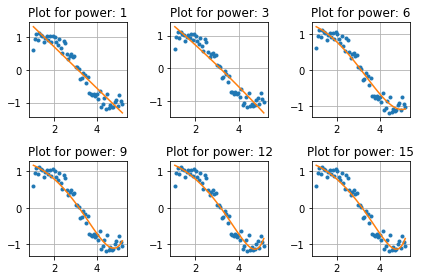

In [8]:
col = ['rss', 'intercept'] + ['coef_x_{}'.format(i) for i in range(1, 16)]
ind = ['pow_{}'.format(i) for i in range(1, 16)]

perf_Lasso = pd.DataFrame(index = ind, columns = col)

plot_dict = {1 : 231, 3 : 232, 6 : 233, 9 : 234, 12 : 235, 15 : 236}

for i in range(1,16):
    perf_Lasso.iloc[i - 1, 0 : i + 2] = example_regression(data, power = i, plot_dict = plot_dict, reg_type = 'Lasso', alpha = 1e-3)

In [9]:
pd.options.display.float_format = '{:,.2g}'.format
perf_Lasso

rss intercept coef_x_1 coef_x_2 coef_x_3 coef_x_4 coef_x_5 coef_x_6  \
pow_1  3.7         2    -0.64      NaN      NaN      NaN      NaN      NaN   
pow_2  3.7       1.9    -0.54   -0.016      NaN      NaN      NaN      NaN   
pow_3  3.7       1.9    -0.54   -0.016       -0      NaN      NaN      NaN   
pow_4  3.1       1.5     -0.2    -0.11       -0   0.0015      NaN      NaN   
pow_5  2.4       1.4       -0    -0.15       -0        0  0.00042      NaN   
pow_6  2.2       1.4       -0    -0.15       -0       -0        0  7.8e-05   
pow_7    2       1.3       -0    -0.13  -0.0025       -0       -0        0   
pow_8  1.9       1.3       -0    -0.12  -0.0043       -0       -0        0   
pow_9  1.8       1.3       -0    -0.12  -0.0044       -0       -0        0   
pow_10 1.9       1.3       -0    -0.12  -0.0025       -0       -0        0   
pow_11 1.9       1.3       -0    -0.13 -0.00044       -0       -0        0   
pow_12 1.9       1.3       -0    -0.13       -0       -0       -0        0   
pow_13 1.9       1.3       -0    -0.13       -0       -0       -0        0   
pow_14 1.9       1.3       -0    -0.13       -0       -0       -0        0   
pow_15 1.9       1.3       -0    -0.13       -0       -0       -0        0   

       coef_x_7 coef_x_8 coef_x_9 coef_x_10 coef_x_11 coef_x_12 coef_x_13  \
pow_1       NaN      NaN      NaN       NaN       NaN       NaN       NaN   
pow_2       NaN      NaN      NaN       NaN       NaN       NaN       NaN   
pow_3       NaN      NaN      NaN       NaN       NaN       NaN       NaN   
pow_4       NaN      NaN      NaN       NaN       NaN       NaN       NaN   
pow_5       NaN      NaN      NaN       NaN       NaN       NaN       NaN   
pow_6       NaN      NaN      NaN       NaN       NaN       NaN       NaN   
pow_7   1.6e-05      NaN      NaN       NaN       NaN       NaN       NaN   
pow_8         0  3.1e-06      NaN       NaN       NaN       NaN       NaN   
pow_9         0        0  5.9e-07       NaN       NaN       NaN       NaN   
pow_10        0        0        0   1.1e-07       NaN       NaN       NaN   
pow_11        0        0        0         0   1.9e-08       NaN       NaN   
pow_12        0        0        0         0   5.9e-09   2.5e-09       NaN   
pow_13        0        0        0         0   6.2e-09   2.5e-09         0   
pow_14        0        0        0         0   6.3e-09   2.5e-09         0   
pow_15        0        0        0         0   6.3e-09   2.5e-09         0   

       coef_x_14 coef_x_15  
pow_1        NaN       NaN  
pow_2        NaN       NaN  
pow_3        NaN       NaN  
pow_4        NaN       NaN  
pow_5        NaN       NaN  
pow_6        NaN       NaN  
pow_7        NaN       NaN  
pow_8        NaN       NaN  
pow_9        NaN       NaN  
pow_10       NaN       NaN  
pow_11       NaN       NaN  
pow_12       NaN       NaN  
pow_13       NaN       NaN  
pow_14         0       NaN  
pow_15         0         0

#### Example 4: logistic regression

In [12]:
from sklearn import linear_model, datasets

iris = datasets.load_iris()
print(iris.DESCR)

X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

'''please change the value of C to observe the results'''
logreg = linear_model.LogisticRegression(C = 1e5)

result = logreg.fit(X, y)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

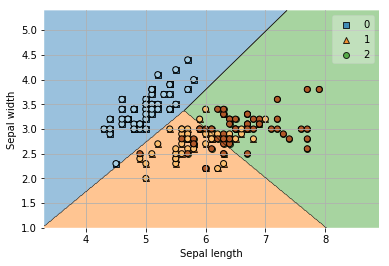

In [13]:
from mlxtend.plotting import plot_decision_regions

plt.figure()
plot_decision_regions(X, y, result)
plt.scatter(X[:, 0], X[:, 1], c = y, edgecolors = 'k', cmap = plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

#### Example 5

In [14]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples = 1000, centers = centers, random_state = 40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

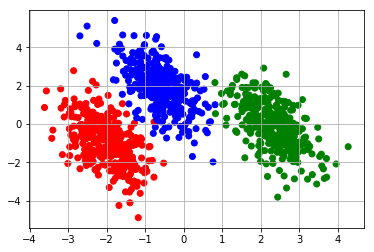

In [15]:
color = "rbg"
color = [color[y[i]] for i in range(len(y))]
plt.scatter(X[:,0],X[:,1],c=color)

training score : 0.995 (multinomial)
training score : 0.976 (ovr)


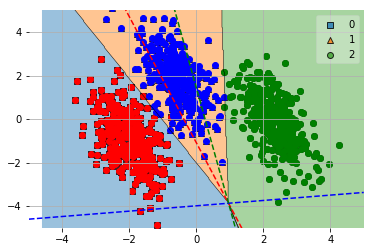

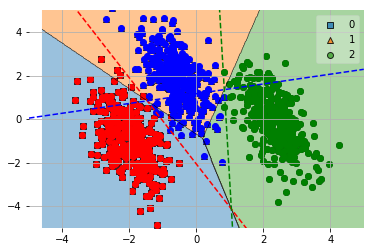

In [16]:
for multi_class in ('multinomial', 'ovr'):
    
    from mlxtend.plotting import plot_decision_regions
    
    clf = LogisticRegression(solver = 'sag', max_iter = 100, random_state = 42, multi_class =multi_class).fit(X, y)

    print("training score : {:.3f} ({})".format(clf.score(X, y), multi_class))
    
    plt.figure()
    plot_decision_regions(X, y, clf)
    plt.axis([-5, 5, -5, 5])

    colors = "rbg"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c = color, cmap = plt.cm.Paired)

    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
        plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                 ls = "--", color = color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

plt.axis([-5, 5, -5, 5])
plt.show()

### Support Vector Machine (SVM)

#### Which one is the best separation?

In [17]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples = 50, centers = 2,
                  random_state = 0, cluster_std = 0.60)

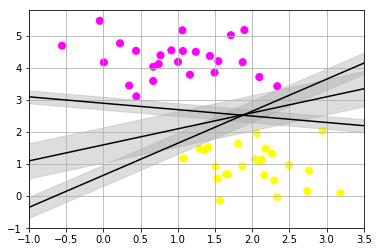

In [18]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'spring')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In [19]:
from sklearn.svm import SVC  # "Support Vector Classifier"
clf = SVC(kernel = 'linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
def plot_svc_decision_function(clf, ax = None):
    
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])

    ax.contour(X, Y, P, colors = 'k',
               levels = [-1, 0, 1], alpha = 0.5,
               linestyles = ['--', '-', '--'])

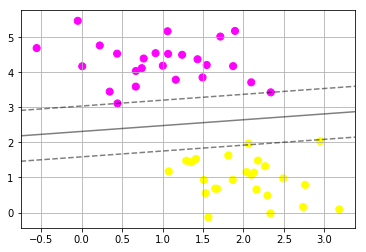

In [21]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'spring')
plot_svc_decision_function(clf);

#### Example: nonseparability

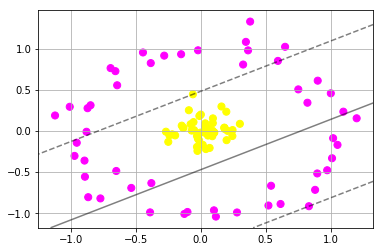

In [22]:
from sklearn.datasets.samples_generator import make_circles

X, y = make_circles(100, factor =.1, noise = .1)

clf = SVC(kernel = 'linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'spring')
plot_svc_decision_function(clf);

In [23]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

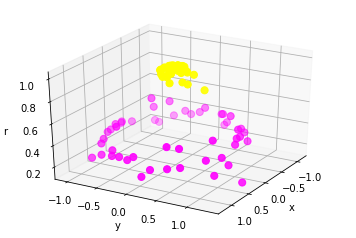

In [24]:
from mpl_toolkits import mplot3d

def plot_3D(elev = 30, azim = 30):
    
    ax = plt.subplot(projection = '3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c = y, s = 50, cmap = 'spring')
    ax.view_init(elev = elev, azim = azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

plot_3D()

(-1.2466459866935309,
 1.326019589490695,
 -1.1779541501343738,
 1.4679764674851827)

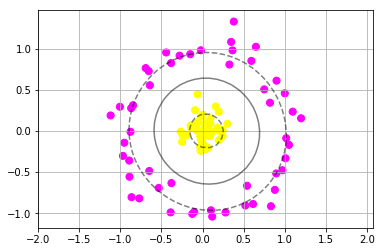

In [25]:
clf = SVC(kernel = 'rbf')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s = 200, facecolors = 'none');
plt.axis('equal')

#### Exercise

In [26]:
from sklearn import svm

In [27]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

In [28]:
clf = svm.SVC(kernel = 'linear')
clf.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [30]:
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

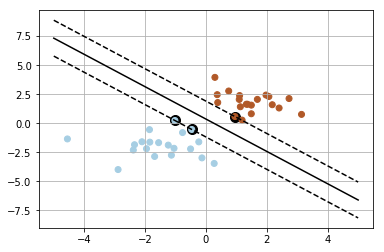

In [31]:
# plot the hyper planes
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

# plot the support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s = 100, facecolors = 'black')

# plot all points
plt.scatter(X[:, 0], X[:, 1], c = Y, cmap = plt.cm.Paired)

plt.axis('tight')
plt.show()

In [32]:
clf = svm.SVC(kernel = 'linear',probability = True)
clf.fit(X, Y)
clf.predict_proba(X)

array([[8.56496089e-01, 1.43503911e-01],
       [7.59386500e-01, 2.40613500e-01],
       [9.42312419e-01, 5.76875813e-02],
       [9.60422042e-01, 3.95779582e-02],
       [9.81583589e-01, 1.84164110e-02],
       [9.40741729e-01, 5.92582706e-02],
       [9.60092155e-01, 3.99078449e-02],
       [9.67106289e-01, 3.28937110e-02],
       [9.32307480e-01, 6.76925196e-02],
       [9.89718573e-01, 1.02814267e-02],
       [9.98759346e-01, 1.24065422e-03],
       [9.78282289e-01, 2.17177105e-02],
       [9.38226833e-01, 6.17731669e-02],
       [9.86785922e-01, 1.32140778e-02],
       [7.59436307e-01, 2.40563693e-01],
       [9.75694589e-01, 2.43054113e-02],
       [9.99052658e-01, 9.47341895e-04],
       [9.88896293e-01, 1.11037068e-02],
       [8.50178301e-01, 1.49821699e-01],
       [9.92829604e-01, 7.17039619e-03],
       [1.85364218e-01, 8.14635782e-01],
       [2.72999734e-02, 9.72700027e-01],
       [4.93829679e-02, 9.50617032e-01],
       [4.26281135e-02, 9.57371886e-01],
       [1.371152

### Decision Tree
* https://github.com/twcmchang/hands-on-ML/blob/master/example/05_decision_tree.ipynb
* https://github.com/twcmchang/hands-on-ML/blob/master/example/06_gradient_boosting_regression.ipynb
* Gini impurity: https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity
* Tree visualization
    * https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c
    * https://scikit-learn.org/stable/modules/tree.html
    * https://github.com/parrt/dtreeviz/tree/master/notebooks

### Principal Component Analysis (PCA)
* Illustration for principal component analysis: http://setosa.io/ev/principal-component-analysis/
    * PCA is widely used for dimensionality reduction.
    * PCA could be done by SVD.
* https://github.com/twcmchang/hands-on-ML/blob/master/example/07_PCA.ipynb

### Clustering: K-Means
* https://github.com/twcmchang/hands-on-ML/blob/master/example/08_kmeans_clustering.ipynb
* https://github.com/twcmchang/hands-on-ML/blob/master/exercise/ex06_kmeans_clustering_color_compression.ipynb
* https://www.datacamp.com/community/tutorials/k-means-clustering-python

### Reinforcement Learning
* Flappy bird bot using reinforcement learning in python: https://github.com/chncyhn/flappybird-qlearning-bot
![](https://camo.githubusercontent.com/d92b8c5ac27bd63f11909ffa5cf7482e1a714ed6/687474703a2f2f692e696d6775722e636f6d2f30304d663332302e706e67)

## Take-Home Message
* [北京量信投资管理有限公司](http://www.liang-xin.com/website/w/h)
* Kai-Fu Lee, [How AI Can Save Our Hmanity](https://www.ted.com/talks/kai_fu_lee_how_ai_can_save_our_humanity/), TED
* Blue3Brown, [Essence of Linear Algebra](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab), Youtube
* Tutorial on Cointegrated VAR: https://www.youtube.com/watch?v=OK1kEu5Ro9Y